In [1]:
import requests
import json
import pandas as pd


# import style dims
url = 'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/style_dims_names.json'

# Fetch the JSON file content
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    try:
        # Load the content into a list
        style_dims_names = json.loads(response.text)
        print("Data loaded successfully:")
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON: {e}")
else:
    print(f"Failed to fetch JSON file: {response.status_code}")

# import fighter data
all_fighter_data = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/blob/main/data/02_intermediate/fighter_data.csv?raw=true')


#import fihgt styles dims
fighters_styles_dims = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/fighters_styles_dims.csv')

Data loaded successfully:


In [2]:
import os
import sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)


In [3]:
# The list of items to remove
items_to_remove = [
    'Stance_Open Stance',
    'Stance_Orthodox',
    'Stance_Sideways',
    'Stance_Southpaw',
    'Stance_Switch'
]

# Remove the items from the style_dims list
style_dims_names_no_stance = [item for item in style_dims_names if item not in items_to_remove]

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

fighters_styles_dims_copy = fighters_styles_dims.copy()
fighters_styles_dims_copy.loc[:, style_dims_names_no_stance] = scaler.fit_transform(fighters_styles_dims_copy[style_dims_names_no_stance])
fighters_styles_dims = fighters_styles_dims_copy



# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)

In [5]:
weight_class = list(fighters_styles_dims['weight_class'].drop_duplicates())
weight_class.remove('OpenWeight')
weight_class.remove('WomenBantamweight')
weight_class.remove('WomenFeatherweight')

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



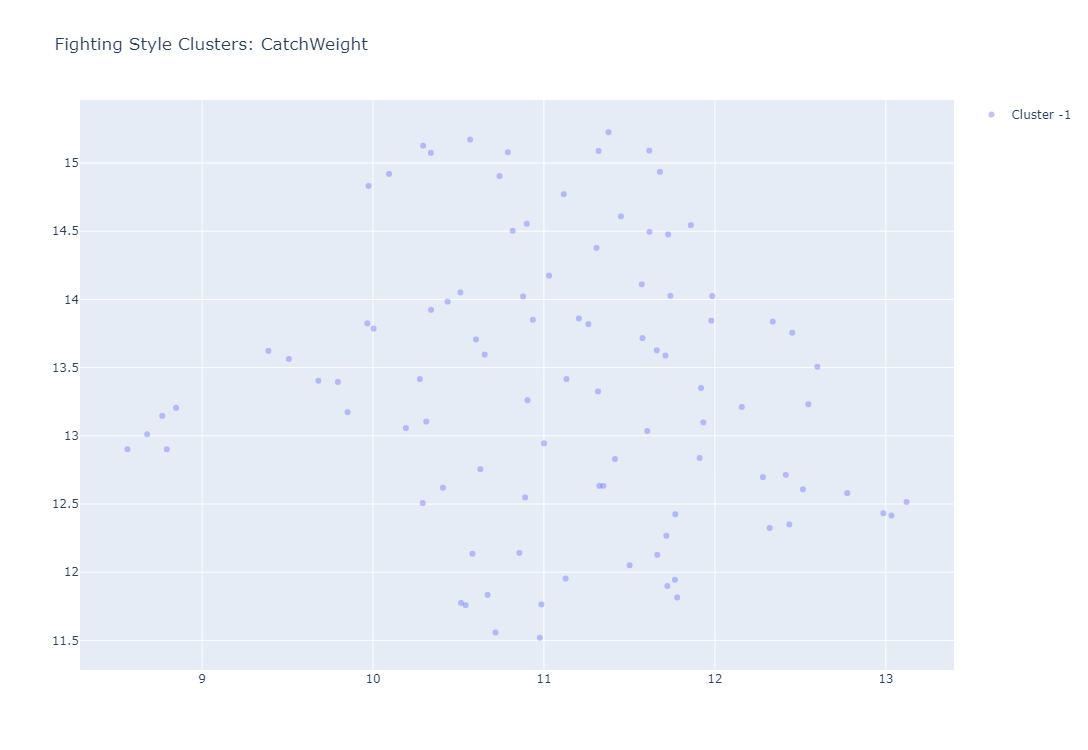

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



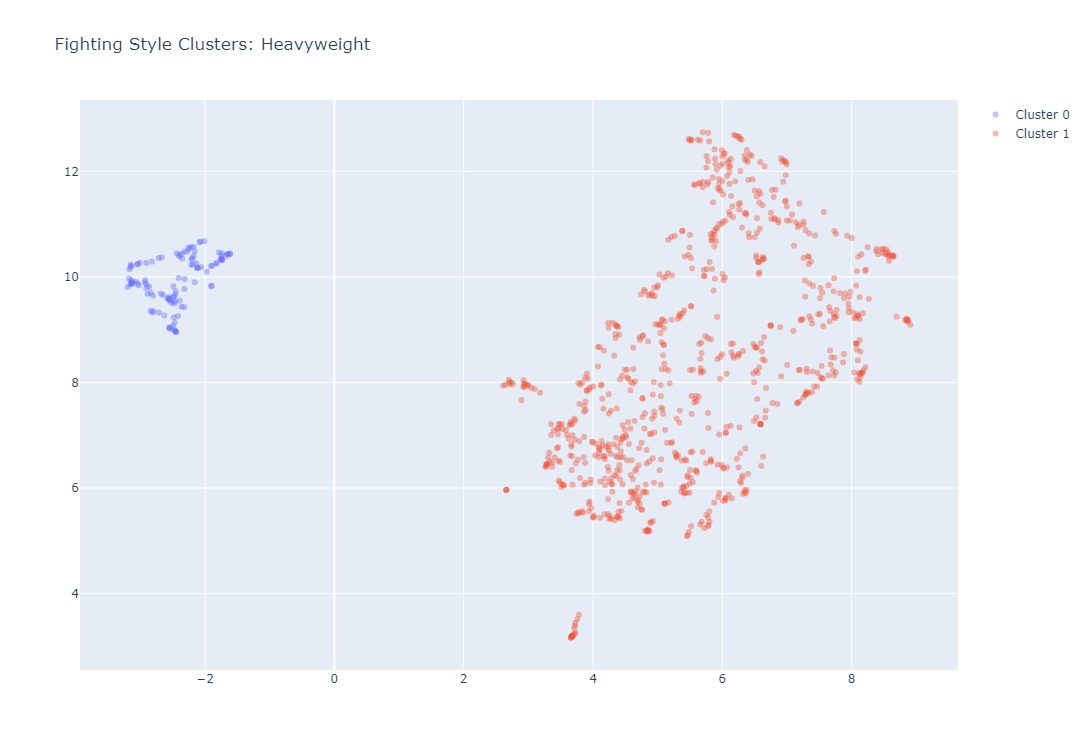

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



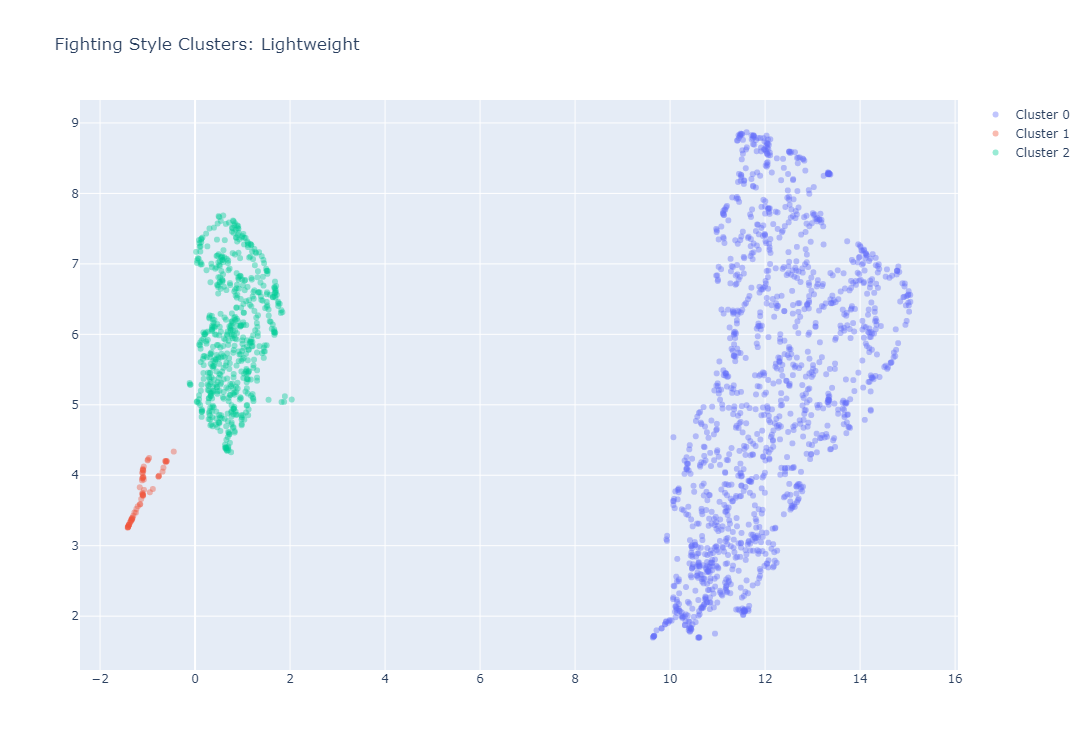

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



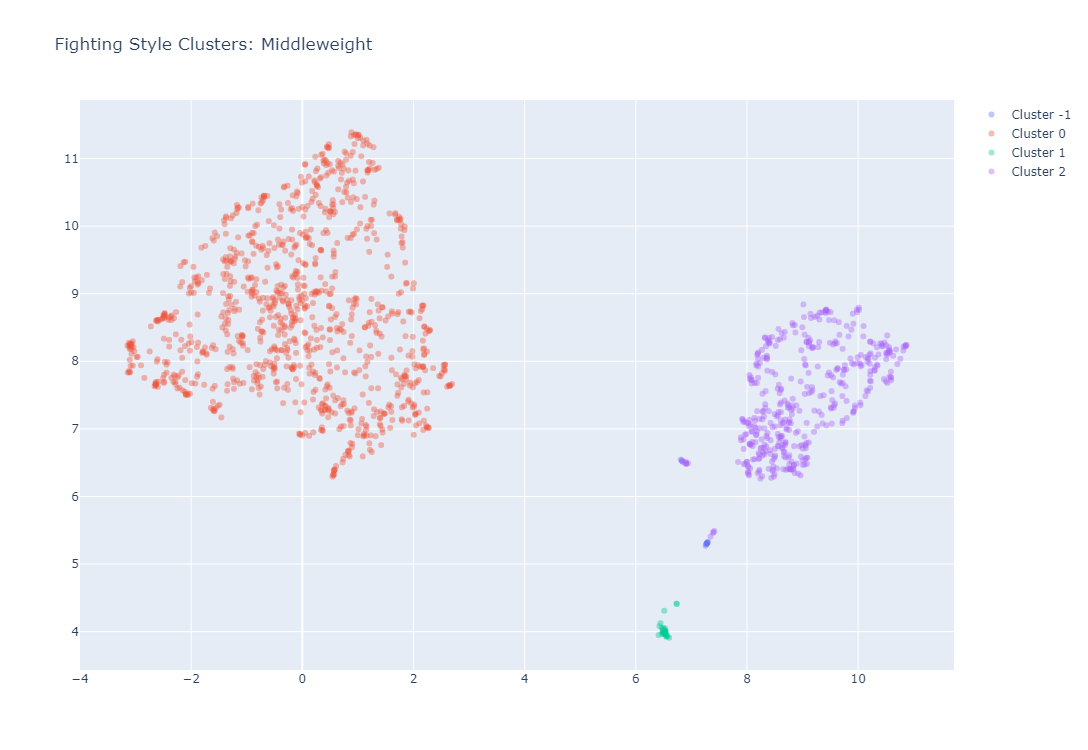

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



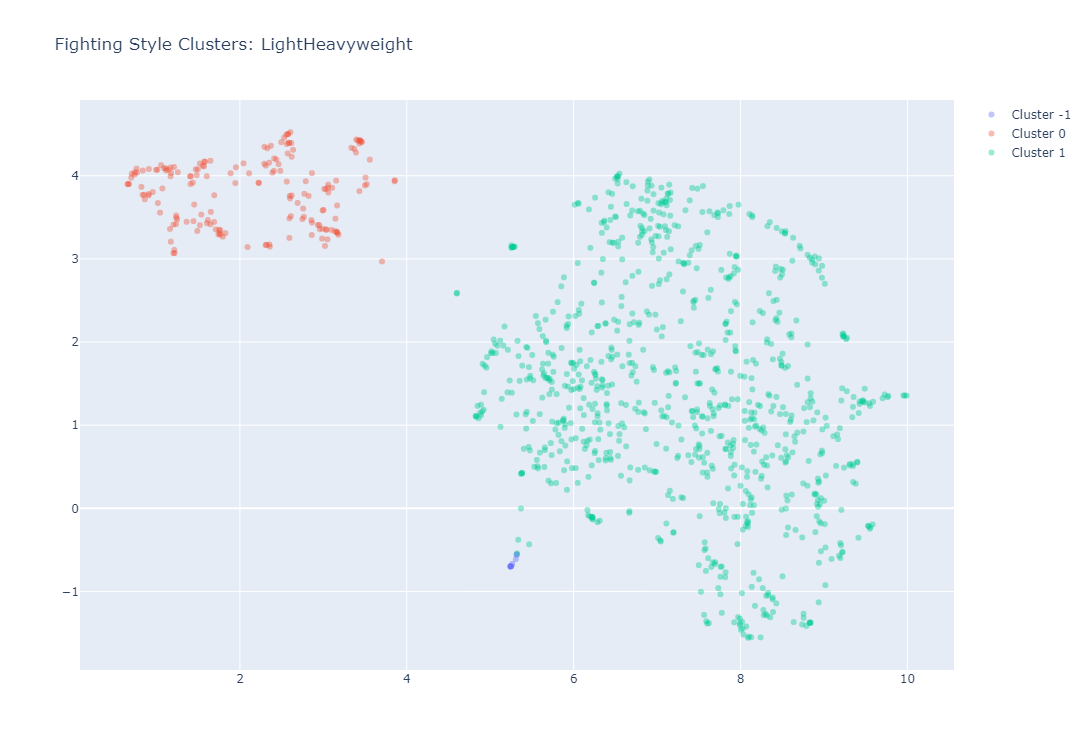

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



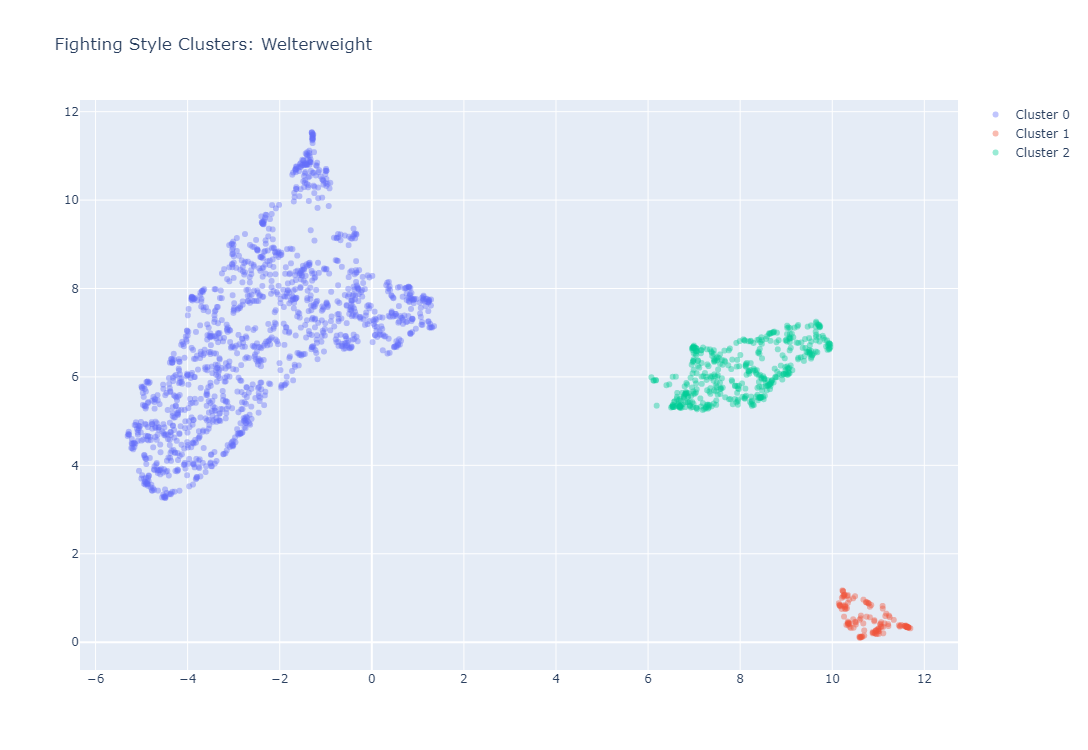

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



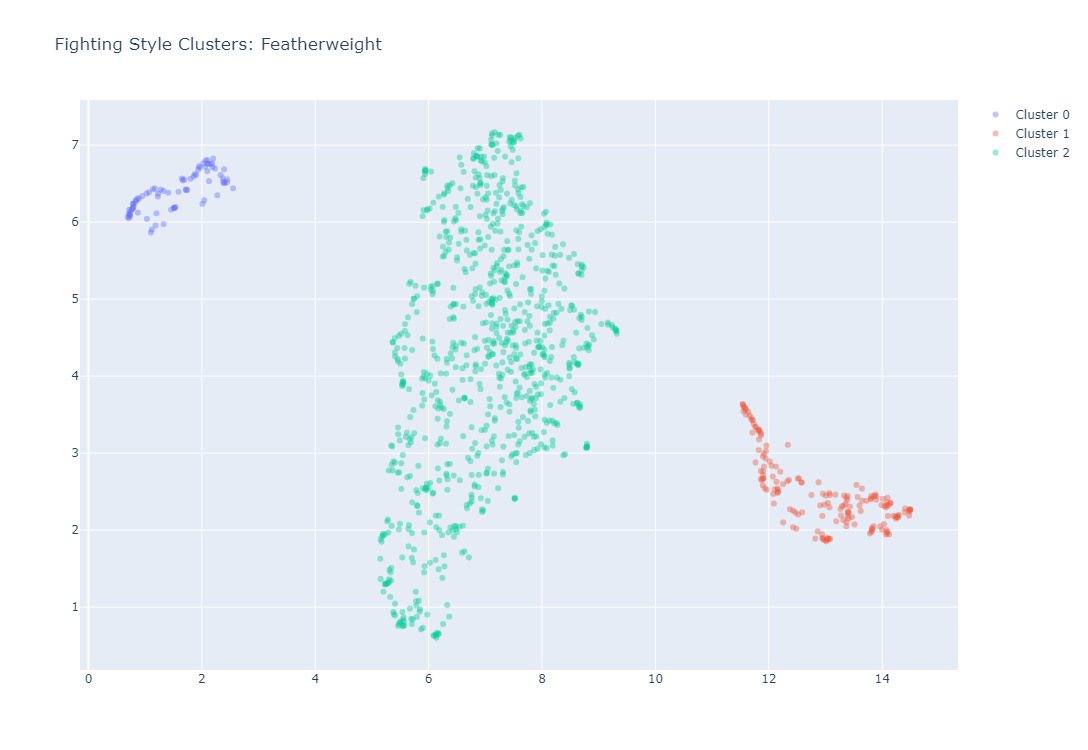

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



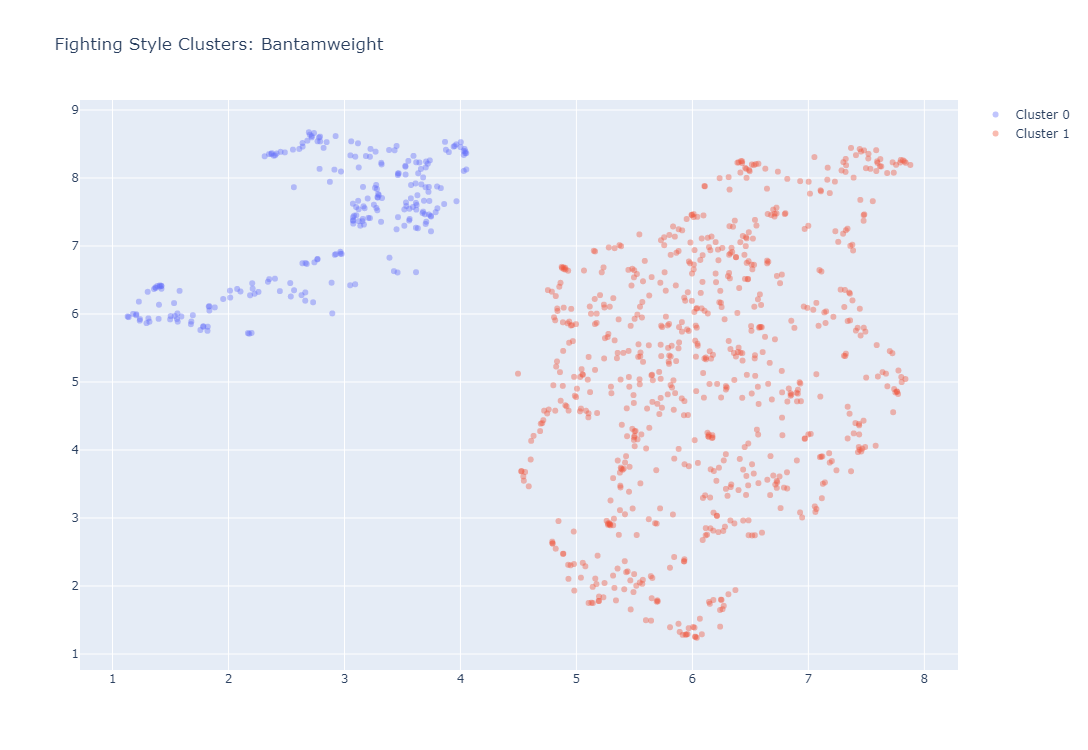

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



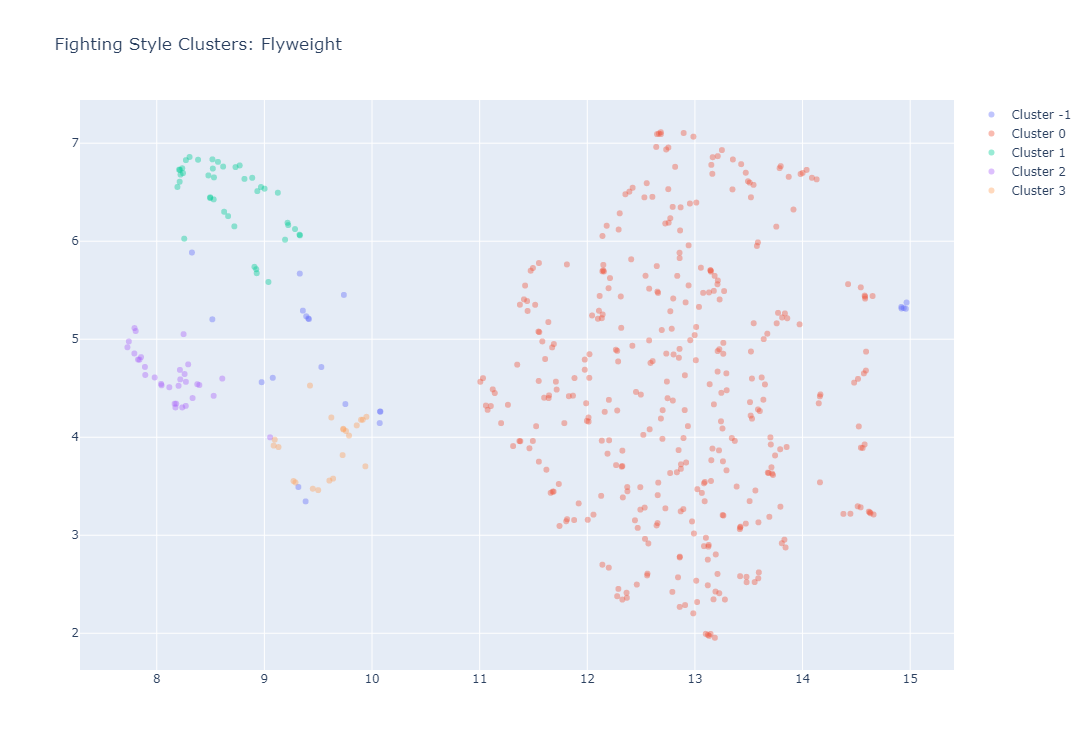

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



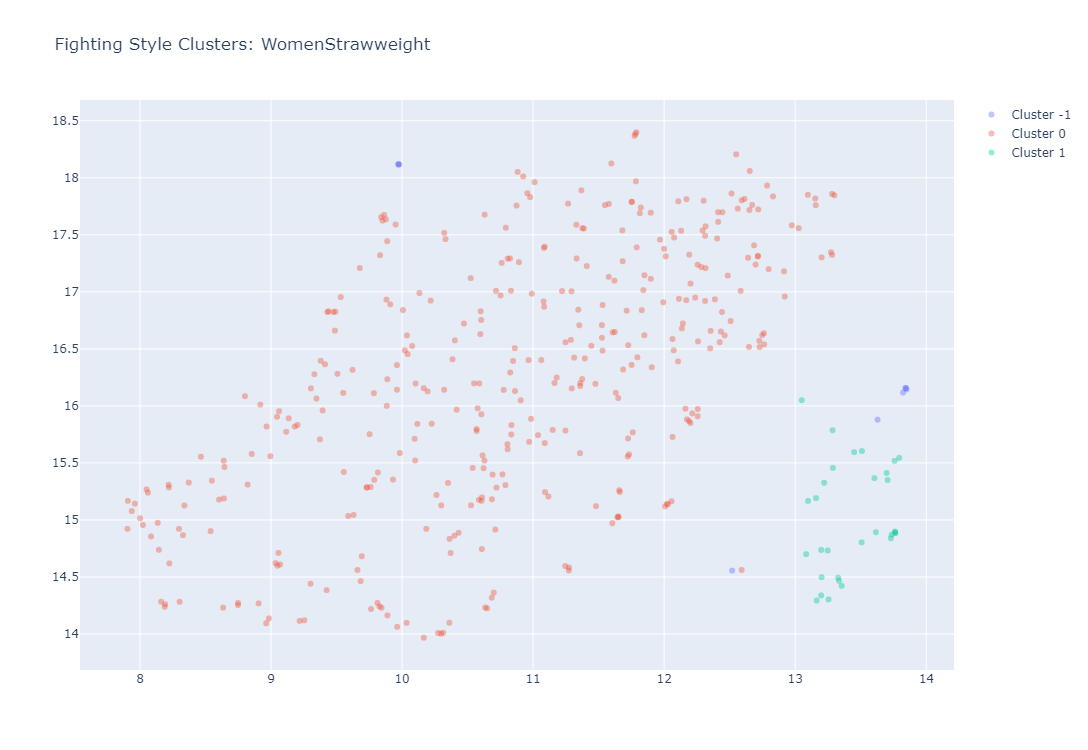

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



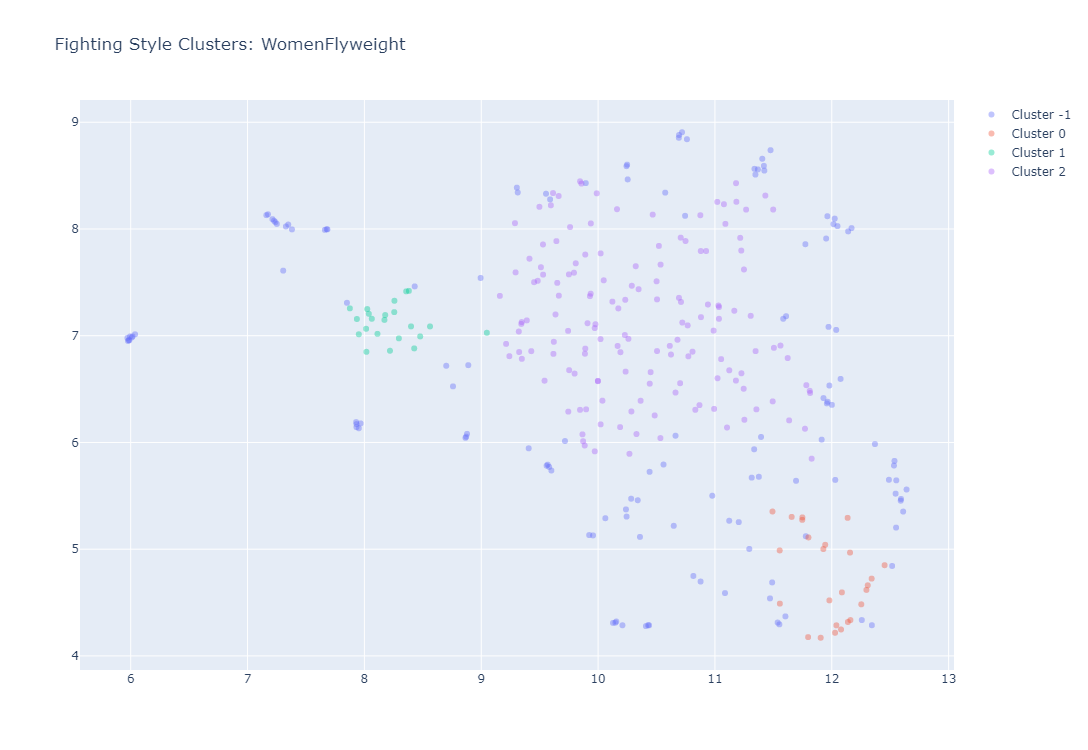

In [29]:
from scripts.cluster_gower_weight import ClusterAnalysis

for weight in weight_class:
    ca = ClusterAnalysis(fighters_styles_dims.loc[fighters_styles_dims['weight_class'] == weight], n_neighbors=10, min_cluster_size=17, min_dist=0.01, cluster_dims=style_dims_names, export_data=True, weight_factor=0.45)
    ca.run()


In [7]:
# import os
# import pandas as pd
# import requests
# from io import StringIO

# # Set your GitHub username, repository name, and path to the directory
# username = 'john-adeojo'
# repository = 'ufc_styles'
# directory_path = 'data/02_intermediate'

# # Generate the GitHub API URL for the repository contents
# api_url = f'https://api.github.com/repos/{username}/{repository}/contents/{directory_path}'

# # Fetch the list of files in the GitHub repository
# response = requests.get(api_url)
# files = response.json()

# all_fighter_clusters = pd.DataFrame()

# for file in files:
#     file_name = file['name']
#     if file_name.startswith('fighter_cluster') and file_name.endswith('.csv'):
#         file_url = file['download_url']
#         response = requests.get(file_url)
#         csv_data = StringIO(response.text)
        
#         df = pd.read_csv(csv_data)
#         all_fighter_clusters = pd.concat([all_fighter_clusters, df], ignore_index=True)

# # Display the DataFrame
# all_fighter_clusters


In [8]:
# all_fighter_clusters.to_csv(r"C:\Users\johna\anaconda3\envs\ufc-env\ufc_styles\data\02_intermediate\all_fighter_clusters.csv", index=False)

In [9]:
# all_fighter_clusters['Stance_Switch'].describe()